In [1]:
#1. Load libraries
import pandas as pd
import lightgbm as lgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
shap.initjs() #This is required to view SHAP plots within a notebook

In [2]:
#2. Run modelling ntoebook
%run "Milestone 1 declarations.ipynb"

In [3]:
#3. Confirm datasets are loaded
#train, test, visualization, and complete datasets. The complete dataset is unfiltered.
for ds in [X_train, y_train, X_test, y_test, X_visualization, y_visualization, all_data]:
    try:
        print(ds.info())
    except:
        print(ds.to_frame().info())
    print('-' * 100)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8505 entries, ('Afghanistan', Timestamp('2020-04-01 00:00:00')) to ('Zimbabwe', Timestamp('2020-05-15 00:00:00'))
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   population                  8505 non-null   float64
 1   population_density          8280 non-null   float64
 2   median_age                  8100 non-null   float64
 3   aged_65_older               7965 non-null   float64
 4   aged_70_older               8055 non-null   float64
 5   gdp_per_capita              8100 non-null   float64
 6   diabetes_prevalence         8280 non-null   float64
 7   hospital_beds_per_thousand  7470 non-null   float64
 8   new_cases                   8505 non-null   float64
 9   total_tests                 3808 non-null   float64
 10  new_tests                   3710 non-null   float64
 11  female_smokers              6345 non-null   float64
 12  

In [4]:
#4. Confirm model is loaded
covid_future_cases_predictive_model

LGBMRegressor(random_state=42)

In [5]:
explainer = shap.TreeExplainer(covid_future_cases_predictive_model)

In [6]:
shap_values = explainer.shap_values(X_train, y_train)

In [7]:
X_train.shape, shap_values.shape

((8505, 13), (8505, 13))

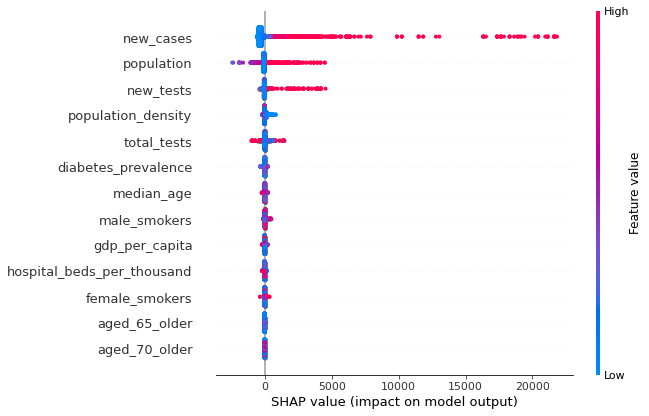

In [8]:
shap.summary_plot(shap_values, X_train )

- new_cases - as the number goes up, the model predict more. What exactly is the model doing? Not exactly predicting new_cases?
- population - as the population is bigger, the model predicts more cases, makes sense
- new_tests - as there are more tests, there are more positives, makes sense
- total_tests - no tests is bad (model predicts more), a lot of tests - model predicts more (makes sense as above).
- others not sure.

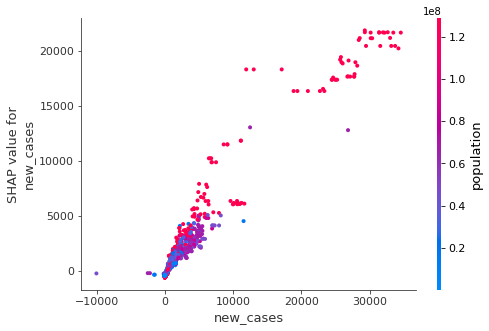

In [9]:
shap.dependence_plot('new_cases', shap_values, features=X_train, interaction_index='population')

- as new_cases increase, the matching SHAP value icreases
- low values of population are found mostly where the new_cases is low (makes sense but needs to be addressed)

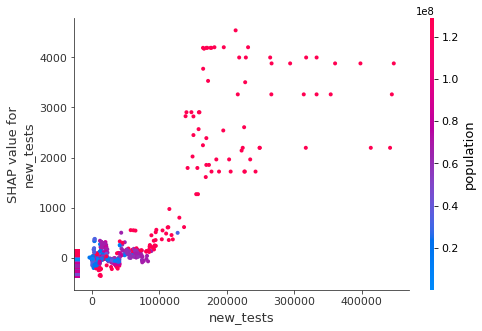

In [10]:
shap.dependence_plot('new_tests', shap_values, features=X_train, interaction_index='population')

- as the number of new_tests increase, the matching SHAP value incresse.
- low population is found where there is low new_tests (makes sense but needs to be addressed, in the sense that it is trivial but does not help in the prediction)
- not sure regarding the bias question. Maybe the answer is yes, there is a bias in the model more tests -> more cases, which in a way is the truth, but needs to be communicated to the user of the model, to prevent confusion with effectiveness of measurements taken in the country. 

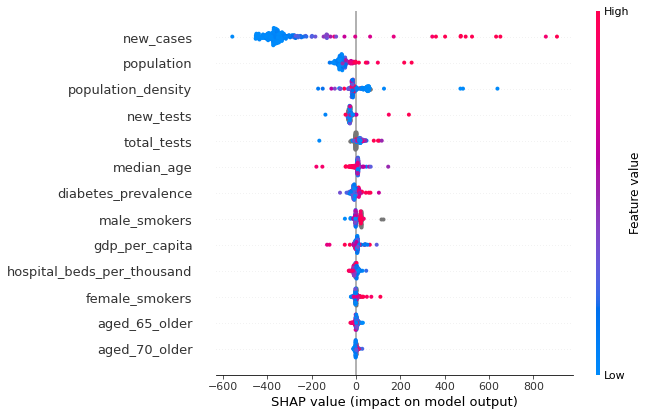

In [11]:
shap_values_visualization = explainer.shap_values(X_visualization, y_visualization)
shap.summary_plot(shap_values_visualization, X_visualization)

In [12]:
shap.force_plot(explainer.expected_value, shap_values=shap_values[:1], features=X_train[:1])

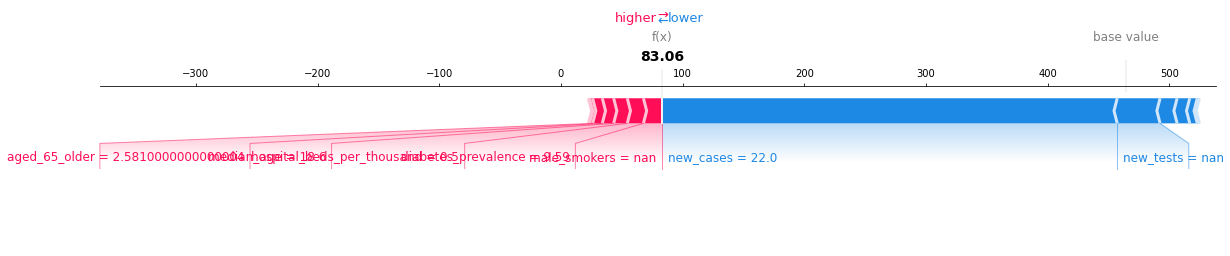

In [13]:
shap.force_plot(explainer.expected_value, shap_values=shap_values[:1], features=X_train[:1], matplotlib=True)

All-NaN slice encountered


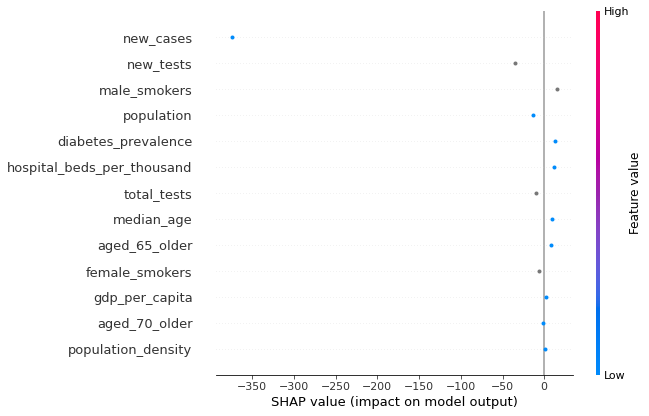

In [14]:
shap.summary_plot(shap_values=shap_values[:1], features=X_train[:1])

- this case gets a low prediction. As of low new_cases, and missing new_tests

In [15]:
shap.force_plot(explainer.expected_value,
                shap_values=shap_values_visualization,
                features=X_visualization)

- not sure what are the patterns and the outliers. Have played with the interactive options above, yet failed to pick something meaningful.

In [16]:
shap.force_plot(explainer.expected_value, shap_values=shap_values[17:18], features=X_train[17:18])

- it looks indeed like the case I have clicked above, yet not sure if it is outlier or not.

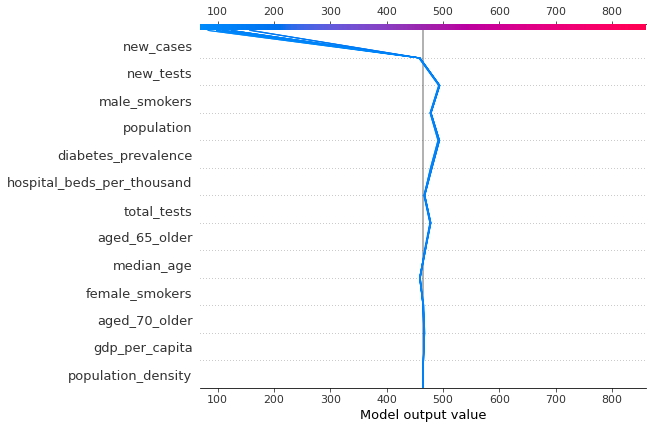

In [21]:
shap.decision_plot(explainer.expected_value, shap_values=shap_values[:20], features=X_train[:20])

- all first 20 cases behave similar and the final prediction is high as of high new_cases